In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, LassoLars
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, explained_variance_score, d2_absolute_error_score
from sklearn.metrics import max_error, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_poisson_deviance


In [50]:
def generate_prediction(classifier_model, train_x, train_y, test_x):

    trained_model = classifier_model.fit(train_x, train_y)
    
    prediction = trained_model.predict(test_x)

    return prediction


def plot_graph(stock_df, test_x, test_y, prediction_y, model_name):    
    ax = plt.axes()
    ax.grid()
    ax.set(xlabel='Date', ylabel='Stock Price', title=model_name)
    test_x['date'] = stock_df['date']

    ax.plot(stock_df['date'], stock_df['close'], label='actual', c='b', linewidth=1)
    ax.plot(test_x['date'], test_y, label='test', c='r', linewidth=1)
    ax.plot(test_x['date'], prediction_y, label='prediction', c='g', linewidth=1)

    ax.xaxis.set_major_locator(mticker. MultipleLocator(18))

    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    plt.tight_layout()
    plt.legend()
    plt.show()


regression_metrics = [r2_score, explained_variance_score, d2_absolute_error_score, max_error, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, mean_poisson_deviance]
metric_names = ['R2 Score', 'Explained Variance Score', 'D2 Absolute Error Score', 'Max Error', 'Mean Absolute Error', 'Mean Squared Error', 'Mean Absolute Percentage Error', 'Mean Poisson Deviance']

def calculate_metrics(y_true, y_pred, model_name):

    print(f"---- Model: {model_name} ----")
    
    for idx, metric in enumerate(regression_metrics):
        metric_result = metric(y_true, y_pred)
        print(f"{metric_names[idx]:30} {metric_result}")

    print("----------------------\n\n")


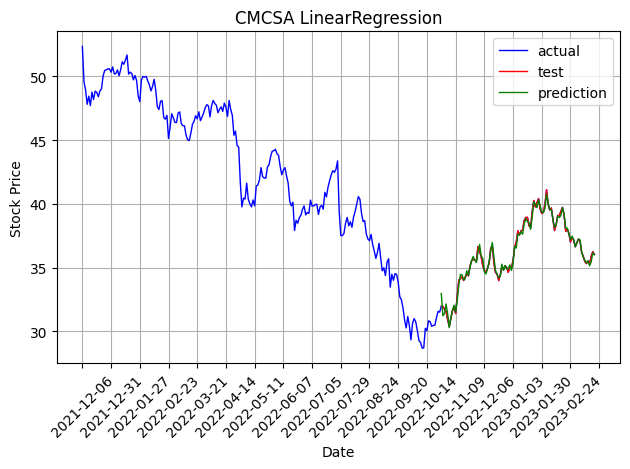

---- Model: CMCSA LinearRegression ----
R2 Score                       0.9895962698940125
Explained Variance Score       0.989599214161593
D2 Absolute Error Score        0.909472856968308
Max Error                      0.9882827600372721
Mean Absolute Error            0.18470336987012537
Mean Squared Error             0.06466240821839056
Mean Absolute Percentage Error 0.0051936906785884805
Mean Poisson Deviance          0.0018554098905053766
----------------------




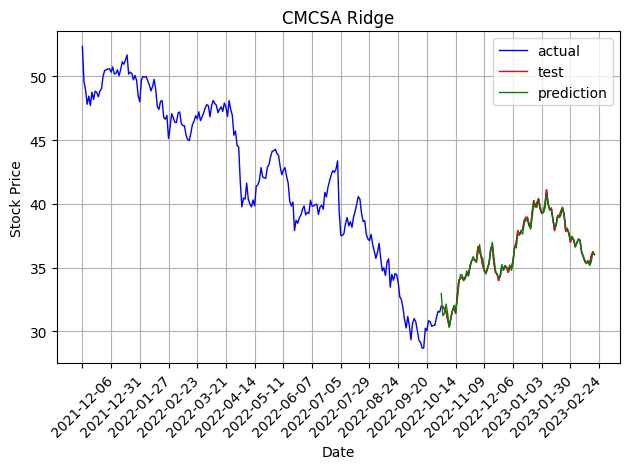

---- Model: CMCSA Ridge ----
R2 Score                       0.9895274138411272
Explained Variance Score       0.9895343381879157
D2 Absolute Error Score        0.9081872121817745
Max Error                      0.9864943028062214
Mean Absolute Error            0.18732648285675274
Mean Squared Error             0.06509036993544953
Mean Absolute Percentage Error 0.005258426971274562
Mean Poisson Deviance          0.0018647633243316407
----------------------




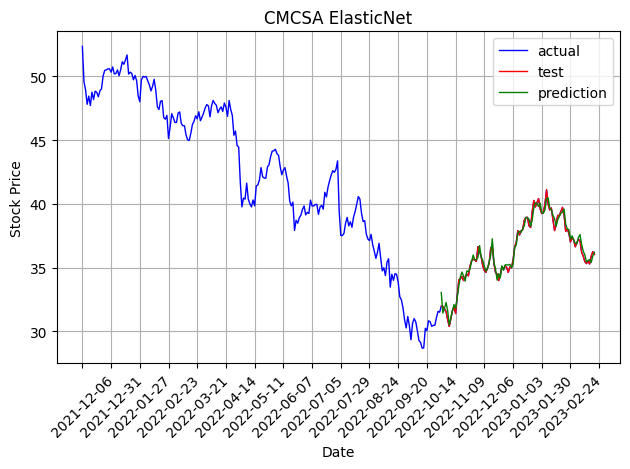

---- Model: CMCSA ElasticNet ----
R2 Score                       0.9778026505400866
Explained Variance Score       0.9787019120412488
D2 Absolute Error Score        0.8573695227881986
Max Error                      1.074092882518812
Mean Absolute Error            0.2910102860308003
Mean Squared Error             0.13796340903895038
Mean Absolute Percentage Error 0.008063153395504761
Mean Poisson Deviance          0.0038230082764925716
----------------------




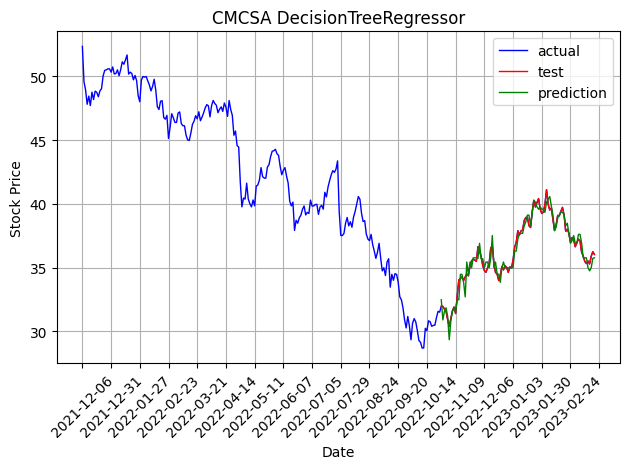

---- Model: CMCSA DecisionTreeRegressor ----
R2 Score                       0.9580379394324119
Explained Variance Score       0.9581991043404176
D2 Absolute Error Score        0.8058208276489313
Max Error                      1.5599999999999952
Mean Absolute Error            0.39618556701030944
Mean Squared Error             0.26080721649484545
Mean Absolute Percentage Error 0.011029283082281235
Mean Poisson Deviance          0.007380359002969915
----------------------




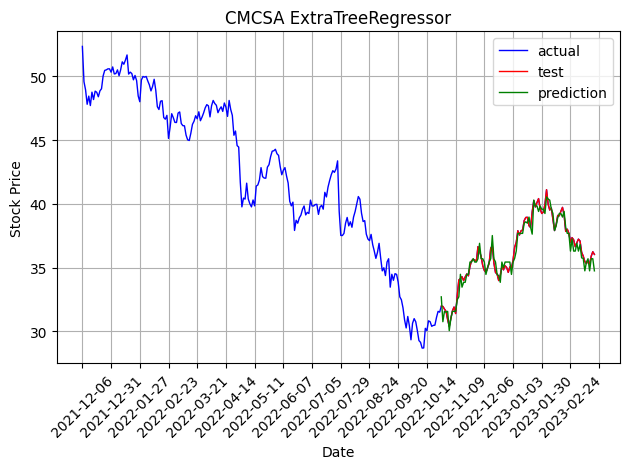

---- Model: CMCSA ExtraTreeRegressor ----
R2 Score                       0.9555978392161532
Explained Variance Score       0.9579627152340854
D2 Absolute Error Score        0.8034460108129959
Max Error                      1.75
Mean Absolute Error            0.40103092783505123
Mean Squared Error             0.2759731958762885
Mean Absolute Percentage Error 0.011086034610524256
Mean Poisson Deviance          0.007690960235884698
----------------------




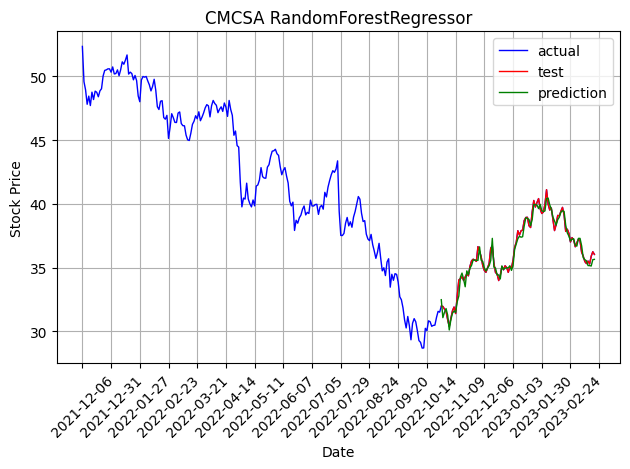

---- Model: CMCSA RandomForestRegressor ----
R2 Score                       0.9752558611454553
Explained Variance Score       0.9764892662875088
D2 Absolute Error Score        0.8510146025971375
Max Error                      1.2518000000000313
Mean Absolute Error            0.3039762886597993
Mean Squared Error             0.15379249474227388
Mean Absolute Percentage Error 0.008404164852269917
Mean Poisson Deviance          0.004291889620356297
----------------------




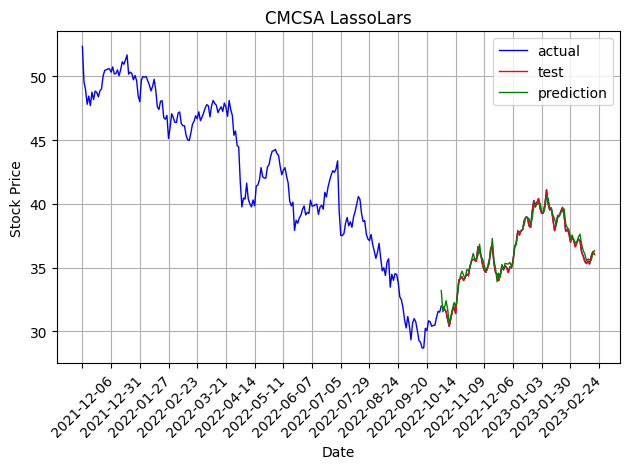

---- Model: CMCSA LassoLars ----
R2 Score                       0.9769653017936318
Explained Variance Score       0.9807098743380909
D2 Absolute Error Score        0.8505707204803877
Max Error                      1.225737285886737
Mean Absolute Error            0.30488194546109765
Mean Squared Error             0.14316779111276573
Mean Absolute Percentage Error 0.008533895510294032
Mean Poisson Deviance          0.004025769830353292
----------------------




In [51]:

ticker_symbol = 'CMCSA'

candle_csv_file_path = './data/candlestick_data.csv'

all_stock_df = pd.read_csv(candle_csv_file_path, header = 0).sort_values(by=['unix_time'])

company_stock_data_df = all_stock_df[all_stock_df['symbol'] == ticker_symbol]

stock_analysis_data_df = company_stock_data_df.drop('date', axis=1).drop('symbol', axis = 1).drop('unix_time', axis=1)

data_x = stock_analysis_data_df.loc[:,stock_analysis_data_df.columns != 'close' ]
data_y = stock_analysis_data_df['close']

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, shuffle=False, random_state=1)

models = [LinearRegression(), Ridge(), ElasticNet(), DecisionTreeRegressor(), ExtraTreeRegressor(), RandomForestRegressor(), LassoLars()]
prediction_list = []

for model in models:
    prediction = generate_prediction(model, x_train, y_train, x_test)
    prediction_list.append([prediction, ticker_symbol + " " + str(model)[:-2]])

for prediction in prediction_list:
    plot_graph(company_stock_data_df, x_test, y_test, prediction[0], prediction[1])
    calculate_metrics(y_test, prediction[0], prediction[1])


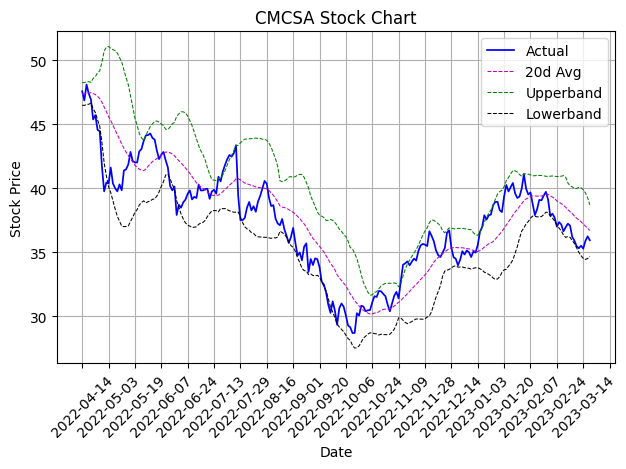

In [52]:
ticker_symbol = 'CMCSA'

tech_indicators_csv_file_path = './data/technical_indicators.csv'

all_stock_df = pd.read_csv(tech_indicators_csv_file_path, header = 0)

stock_technical_df = all_stock_df[all_stock_df['symbol'] == ticker_symbol].drop('symbol', axis = 1).sort_values(by=['unix_time'])

ax = plt.axes()
ax.grid()
ax.set(xlabel='Date', ylabel='Stock Price', title=ticker_symbol + ' Stock Chart')

ax.plot(stock_technical_df['date'], stock_technical_df['close'], label='Actual', c='b', linewidth=1.25)
ax.plot(stock_technical_df['date'], stock_technical_df['middleband'], label='20d Avg', c='m', linewidth=.75, linestyle = 'dashed')
ax.plot(stock_technical_df['date'], stock_technical_df['upperband'], label='Upperband', c='g', linewidth=.75, linestyle = 'dashed')
ax.plot(stock_technical_df['date'], stock_technical_df['lowerband'], label='Lowerband', c='k', linewidth=.75, linestyle = 'dashed')

ax.xaxis.set_major_locator(mticker. MultipleLocator(12))

for tick in ax.get_xticklabels():
    tick.set_rotation(45)

plt.tight_layout()
plt.legend()
plt.show()

